In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\DIVYAM\\Downloads\\DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv")
df.head(2)

,Unnamed: 0,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,11,26,7,3,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,4
1,1,36,0,7,3,1,118,13,18,50,...,1,1,1,1,0,0,98,178,31,0


In [3]:
# task-1

1.Why is the ID column is having repeated values?
Ans- ID column is having repeated values because every person has been alloted one unique id and when they are being absent the absent is being registered to that id. There are 12 months in an year so it cannot be possible that one person can only take one leave, He/She will take at least 1 leave per month so because of those leaves there are multliple entries. 
2.What are the reasons telling us about the people?
Ans- Reasons are telling us that people are suffering from multiple diseases to cure those they are going to the doctors for consultation atleast once a month, so that they could stay healthy and be fit to work for more years.
3.Who should be punished by the management?
Ans. I think the people who really needs to be punished are the people who don't have a reason for their absence (Reason 26-unjustified absence).
4.Who should be rewarded by the management?
Ans - The are some people who should be rewarded by the mangement for showing their positive attitude towards the work are the people are suffering from some major diseases but are still not taking leaves that much.


In [4]:
##########################

In [5]:
df.describe()

,Unnamed: 0,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,369.500000,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,213.763888,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,184.750000,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,369.500000,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,554.250000,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,739.000000,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [6]:
df.shape

(740, 22)

In [7]:
df.isnull().sum()

Unnamed: 0                         0
ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [8]:
# check all values to see if there is any meaningless data like # or other characters
for i in df.columns:   # very imp
    print(i,"contains \n:",df[i].value_counts())               

Unnamed: 0 contains 
: Unnamed: 0
0      1
497    1
488    1
489    1
490    1
      ..
248    1
249    1
250    1
251    1
739    1
Name: count, Length: 740, dtype: int64
ID contains 
: ID
3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
9       8
6       8
23      8
27      7
12      7
30      7
2       6
7       6
26      5
32      5
29      5
19      3
21      3
31      3
8       2
16      2
4       1
35      1
Name: count, dtype: int64
Reason for absence contains 
: Reason for absence
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: count, dtype: int64
Month of absence contains 
: Month of absence
3     87
2     72
10  

In [9]:
columns = [ 'Month of absence', 'Transportation expense', 'Distance from Residence to Work',
           'Service time','Age', 'Work load Average/day ', 'Hit target', 'Son', 'Pet','Weight',
           'Height', 'Body mass index','Absenteeism time in hours']

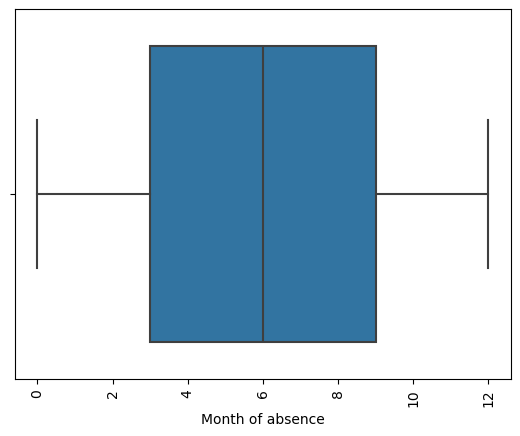

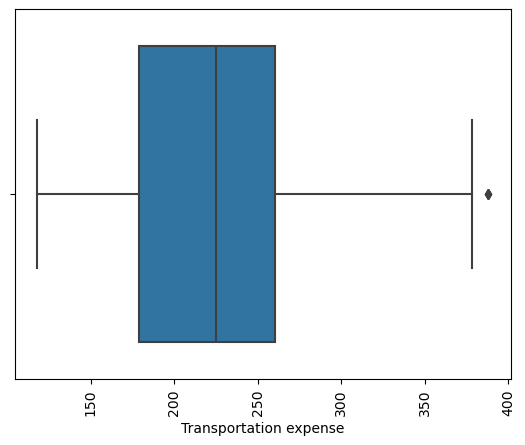

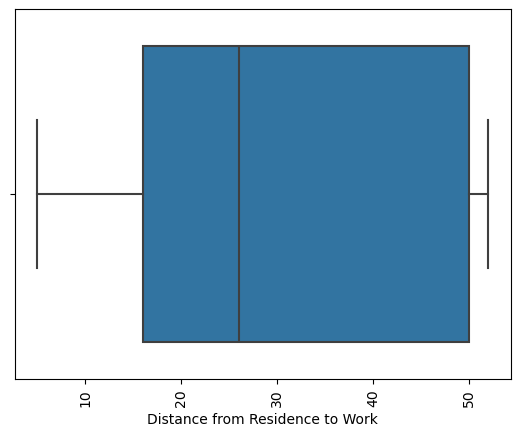

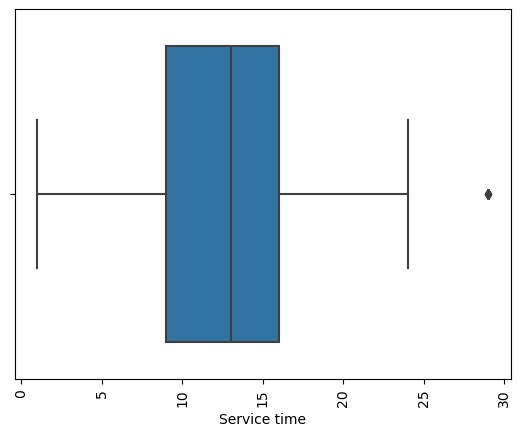

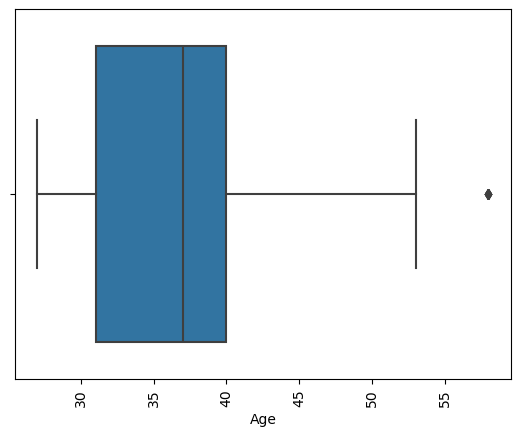

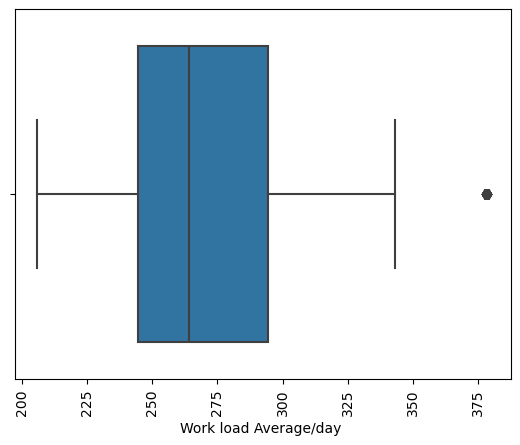

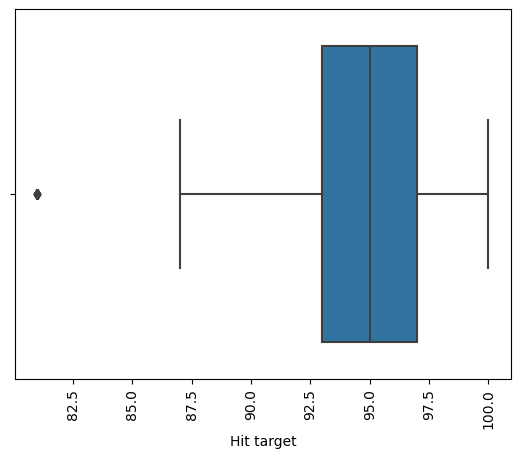

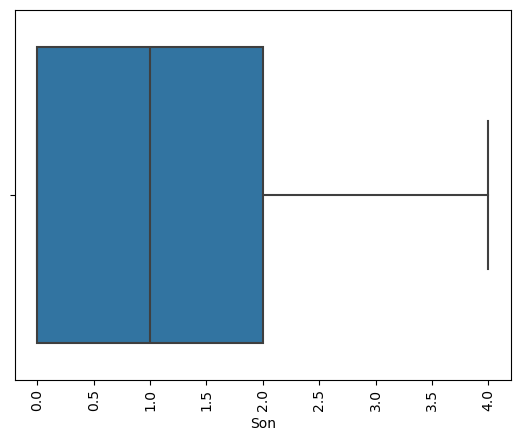

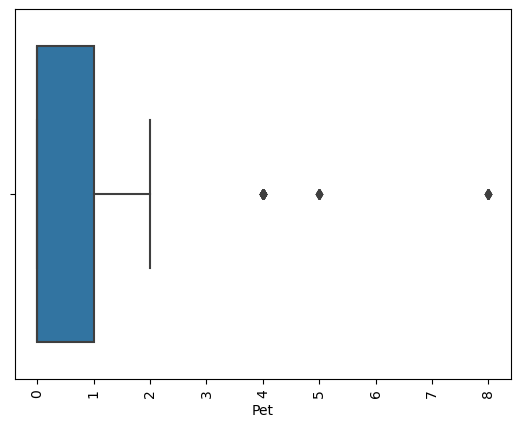

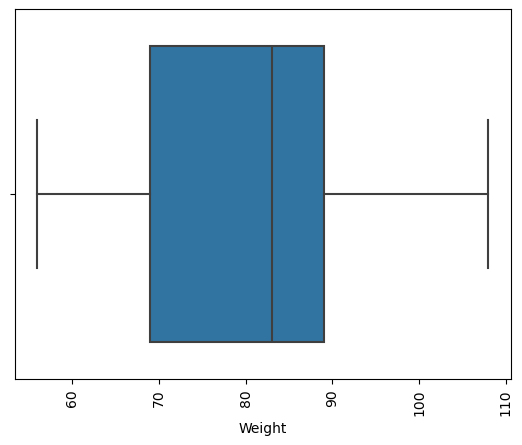

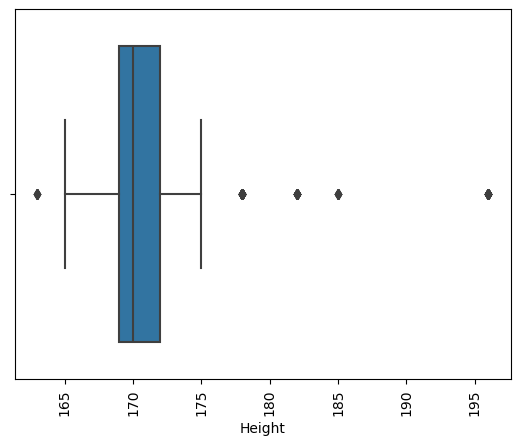

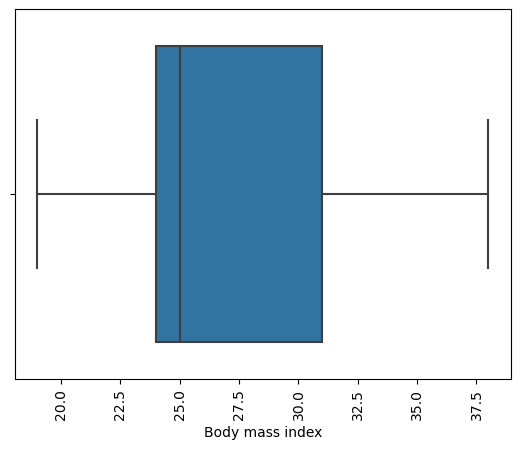

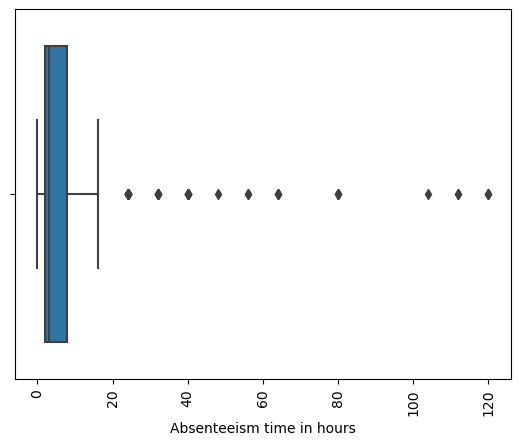

In [10]:
for i in columns:
    sns.boxplot(x=df[i])
    plt.xticks(rotation=90)
    plt.show()

Month of absence  has values:
 [ 7  8  9 10 11 12  1  2  3  4  5  6  0]


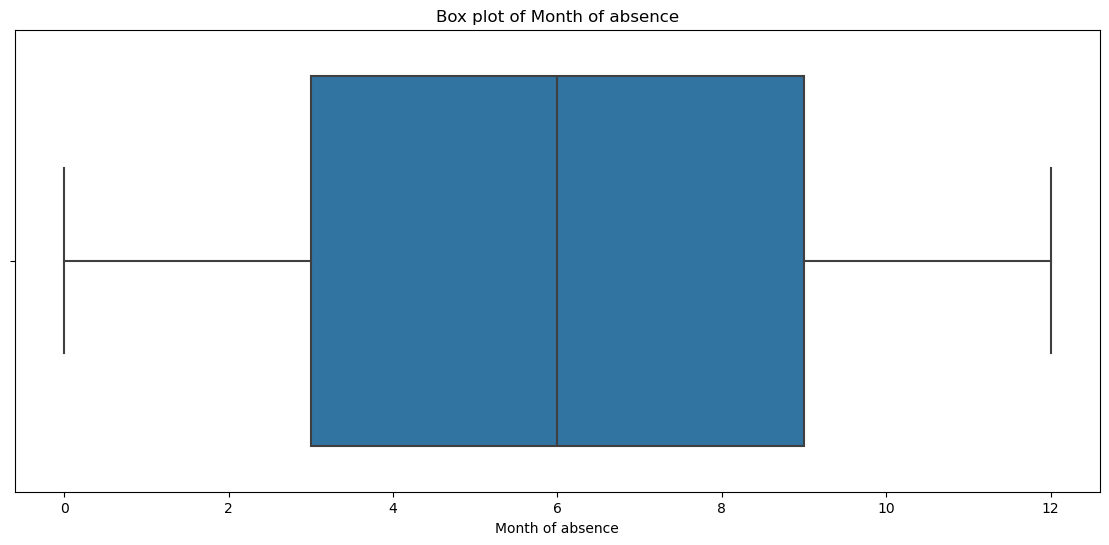

In [11]:
def treat_outlier(df, conti):
    q1 = df[conti].quantile(0.25)
    q3 = df[conti].quantile(0.75)
    
    iqr = q3 - q1
    
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    median_value = df[conti].median()
    
    df.loc[df[conti] < lower_fence, conti] = median_value
    df.loc[df[conti] > upper_fence, conti] = median_value
    
    return df
 
def analyze_numerical_columns(df, conti):
    for column in conti:

        # Treat outliers
        df = treat_outlier(df, column)
        print(column, " has values:\n", df[column].unique())
        
        plt.figure(figsize=(14, 6))
        
        # Boxplot 
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column}')
        
        plt.show()
conti = ["Month of absence"]


analyze_numerical_columns(df, conti)

In [12]:
df["Month of absence"].unique

<bound method Series.unique of 0      7
1      7
2      7
3      7
4      7
      ..
735    7
736    7
737    0
738    0
739    0
Name: Month of absence, Length: 740, dtype: int64>

In [13]:
df["Month of absence"].replace(0, None, inplace=True)
df["Month of absence"].fillna(df["Month of absence"].median(), inplace=True)


In [14]:
df["Month of absence"].unique

<bound method Series.unique of 0      7.0
1      7.0
2      7.0
3      7.0
4      7.0
      ... 
735    7.0
736    7.0
737    6.0
738    6.0
739    6.0
Name: Month of absence, Length: 740, dtype: float64>

In [15]:
df.columns 

Index(['Unnamed: 0', 'ID', 'Reason for absence', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [16]:
# scaling will be done on conti columns 

In [17]:
# Disciplinary failure,Social drinker ,Social smoker,Pet are boolean columns

# label encoder will be used for reason of absence, day of the week , season , education

# transport expense to be converted in float 

In [18]:
df.dtypes

Unnamed: 0                           int64
ID                                   int64
Reason for absence                   int64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [19]:
# task-2

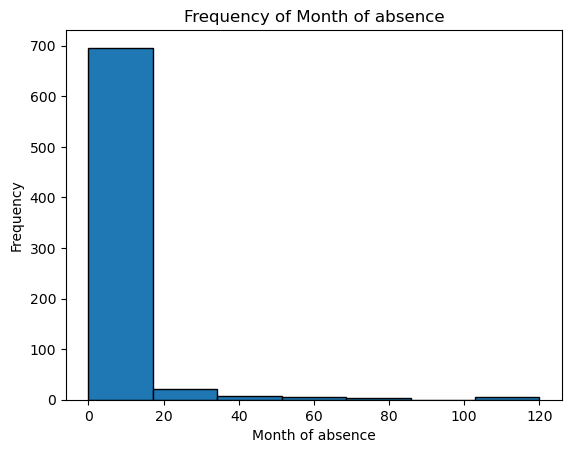

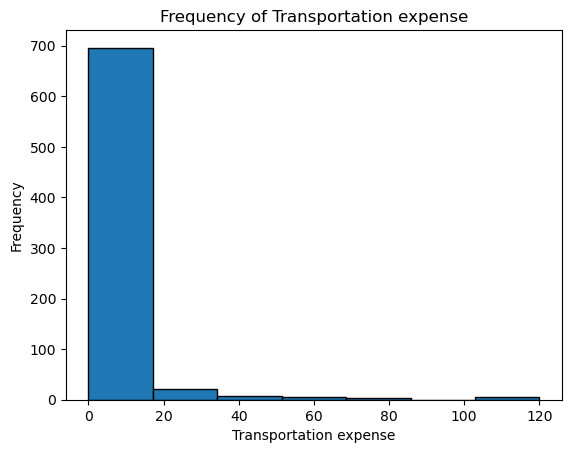

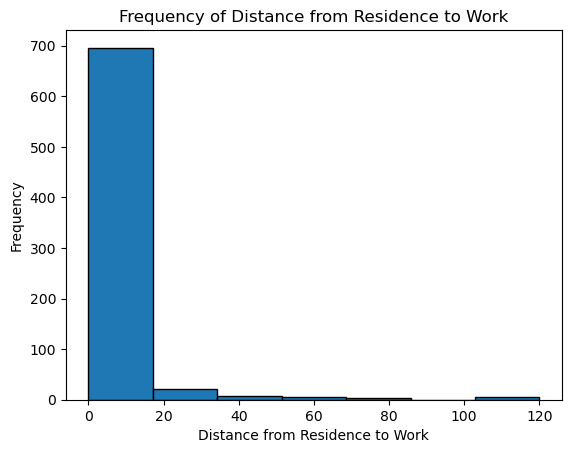

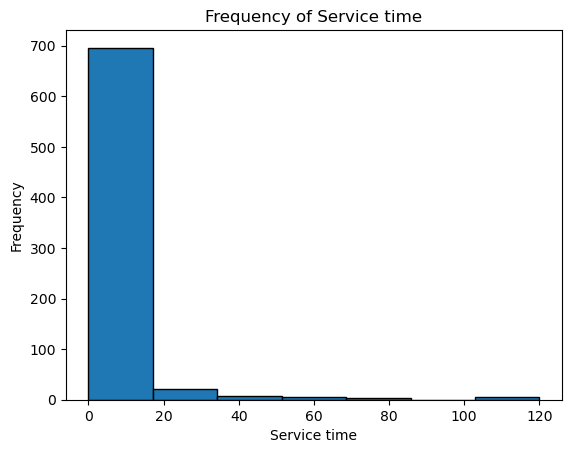

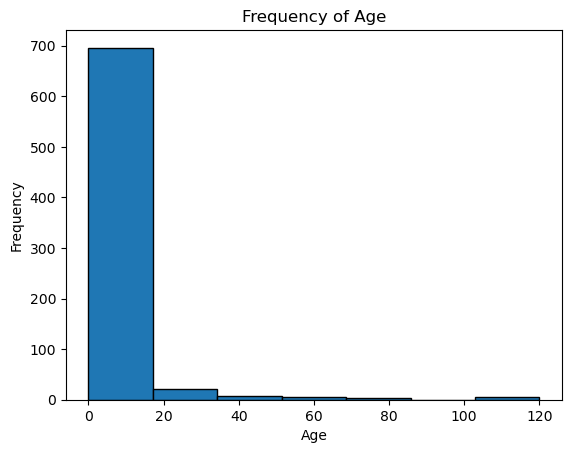

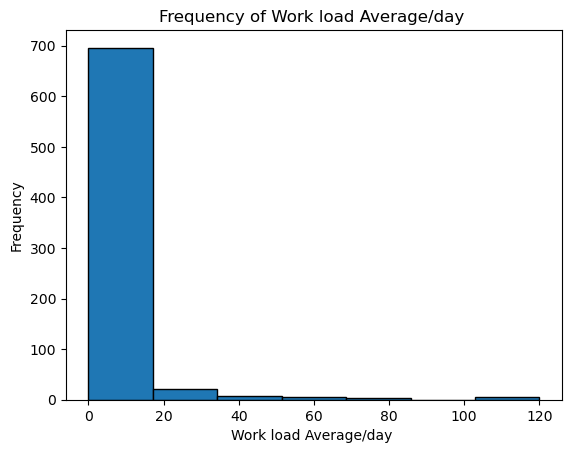

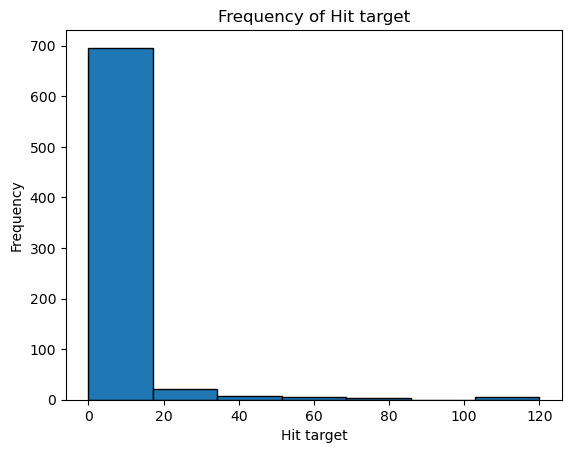

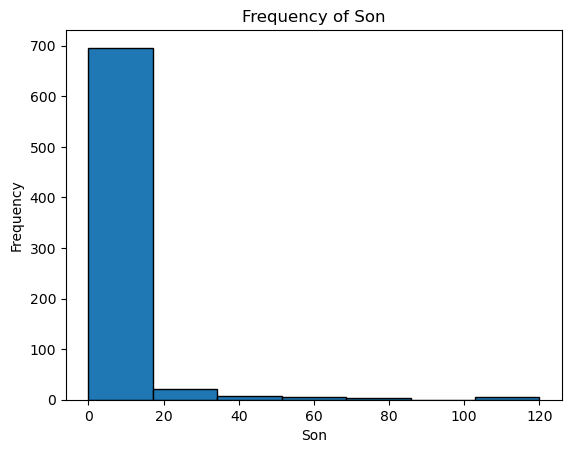

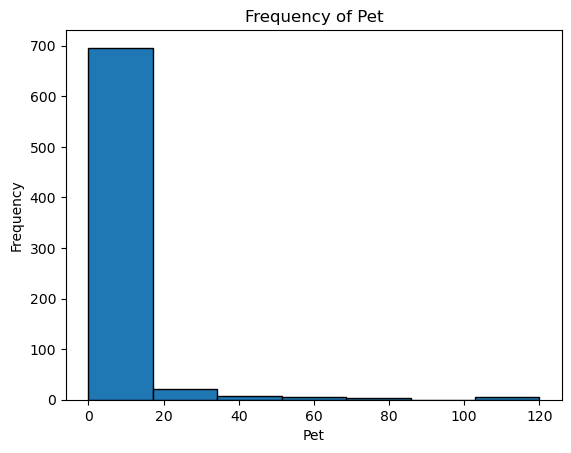

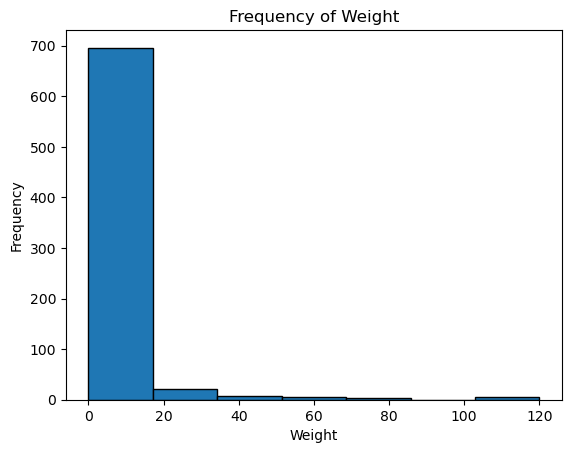

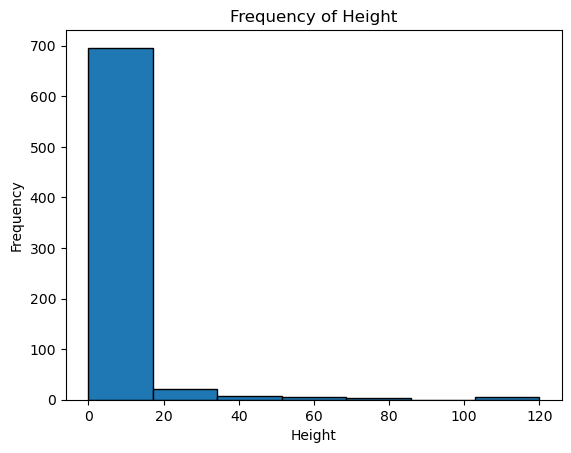

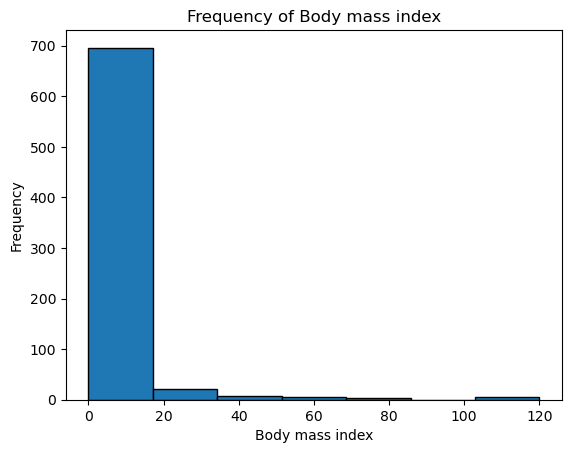

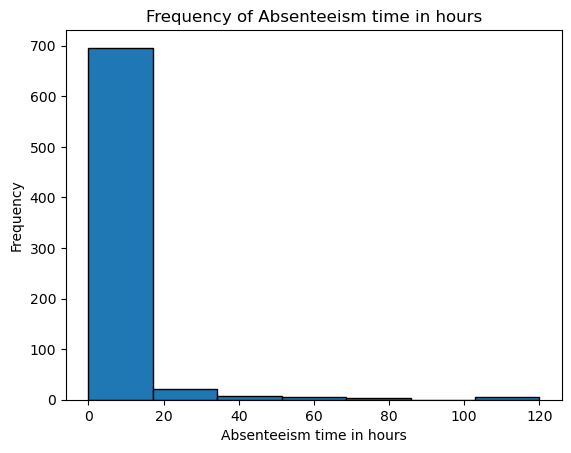

In [20]:
for col in columns:
    patches = plt.hist(df['Absenteeism time in hours'], edgecolor= "black", bins = 7)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title("Frequency of "+str(col))
    plt.show()

Questions 
Q1.Which age group is being the most absent group out of the total?
Ans-As you can see in the above histogram the most absentees are in the frequency of 0-2.5 hours.


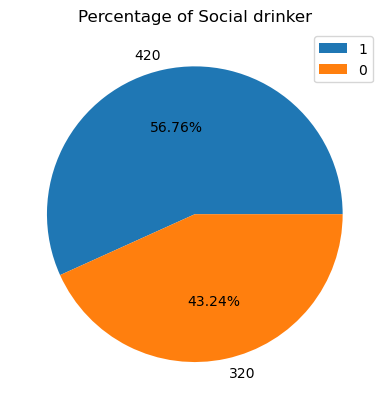

In [21]:
# Q2.What is the percentage of social drinker and smoker?
plt.pie(df['Social drinker'].value_counts(),labels = df['Social drinker'].value_counts(), autopct= "%0.02f%%")
plt.legend(df['Social drinker'].value_counts().index)
plt.title("Percentage of Social drinker")
plt.show()

In the above pie chart, we get to know that 56.76% of people are are social drinkers

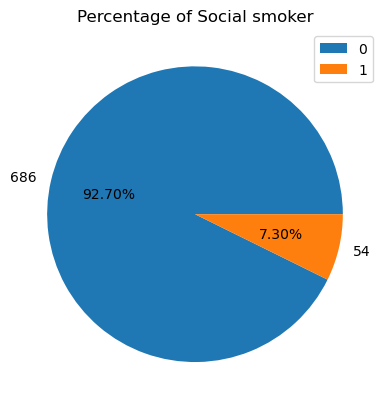

In [22]:
plt.pie(df['Social smoker'].value_counts(),labels = df['Social smoker'].value_counts(), autopct= "%0.02f%%")
plt.legend(df['Social smoker'].value_counts().index)
plt.title("Percentage of Social smoker")
plt.show()

7.30% of the population are social smokers out of all people.

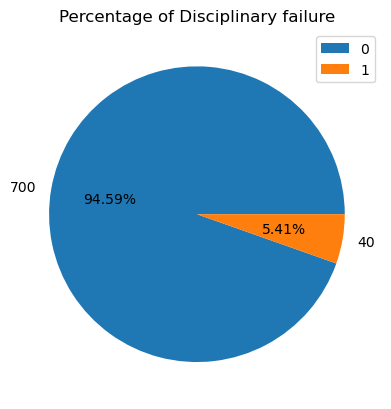

In [23]:
# Q3.What is the percentage of displinary failures out of all the people?
plt.pie(df['Disciplinary failure'].value_counts(),labels = df['Disciplinary failure'].value_counts(), autopct= "%0.02f%%")
plt.legend(df['Disciplinary failure'].value_counts().index)
plt.title("Percentage of Disciplinary failure")
plt.show()

5.40% of population had an incident of disciplinary failure out of all people

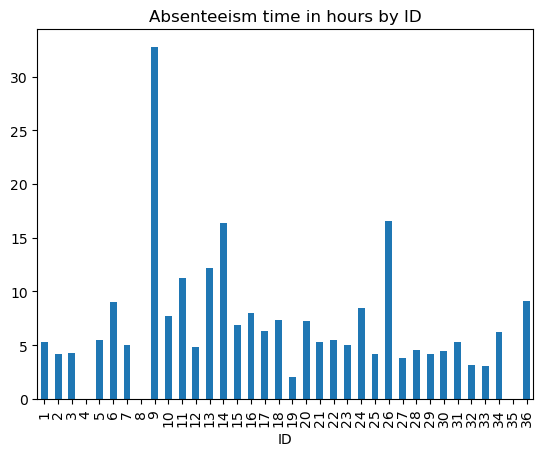

In [24]:
# Q4. What is the average absenteesim time for all individuals?
absenteeism_by_id = df.groupby("ID")["Absenteeism time in hours"].mean()
absenteeism_by_id.plot(kind="bar")
plt.title("Absenteeism time in hours by ID")
plt.show()

The chart is howing average absenteesim for all individuals as you can see that the ID-6 is holding the title of being the most absent person and next to him is ID-11 person.

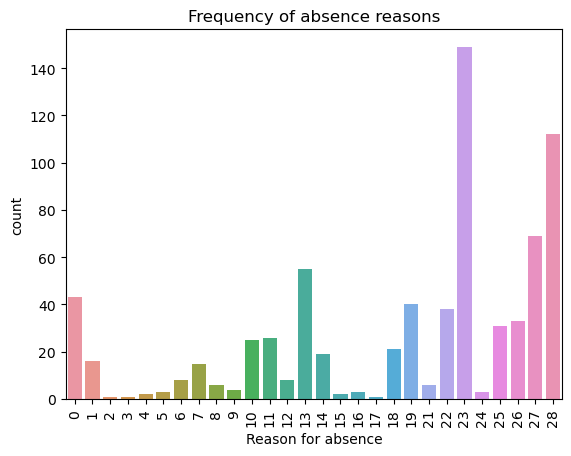

In [25]:
#Q5.Which reason for absence is being used the most?
sns.countplot(x="Reason for absence", data=df)
plt.xticks(rotation = 90)
plt.title("Frequency of absence reasons")
plt.xlabel("Reason for absence")
plt.ylabel("count")
plt.show()

As you can see in the above chart medical consultation is the most used reason for absence.

In the above chart we are getting information about the most used reason for absence which is Neoplasms.

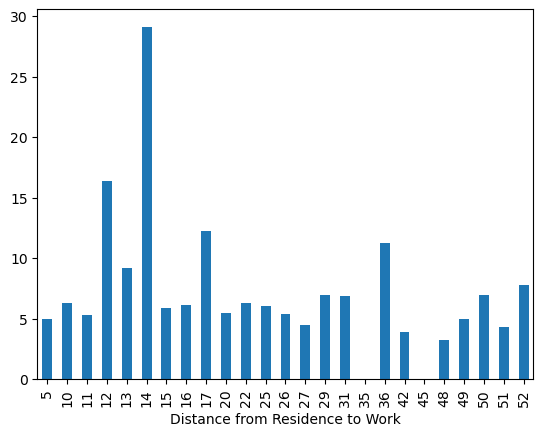

In [26]:
# Q6.Can distance be also a reason for absence.
absenteeism_by_distance = df.groupby("Distance from Residence to Work")["Absenteeism time in hours"].mean()
absenteeism_by_distance.plot(kind="bar")
plt.show()

From the above chart we get to know that distance from residence to work can also be the reason for absence of a person. 

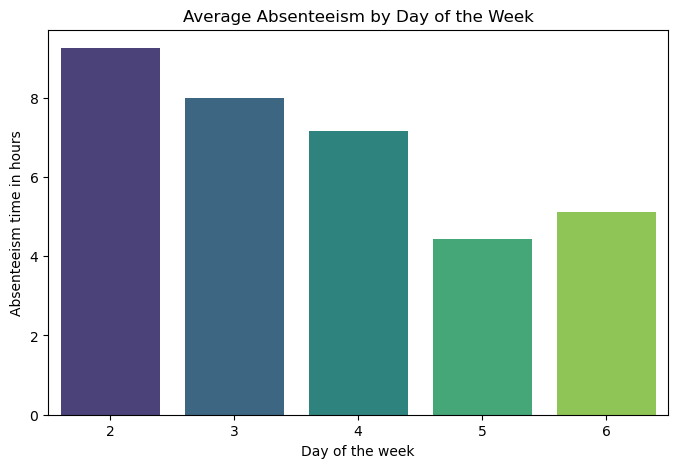

In [27]:
# Q7. Is there a trend in absenteeism based on the day of the week?
absenteeism_by_day = df.groupby('Day of the week')['Absenteeism time in hours'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Day of the week', y='Absenteeism time in hours', data=absenteeism_by_day, palette="viridis")
plt.title("Average Absenteeism by Day of the Week")
plt.show()

The People are being more absent in the starting of the week as compared to the end.There can be a reason why there are being more absent on monday is because after spending a long weeken they get lethargic a bit on monday to do work 


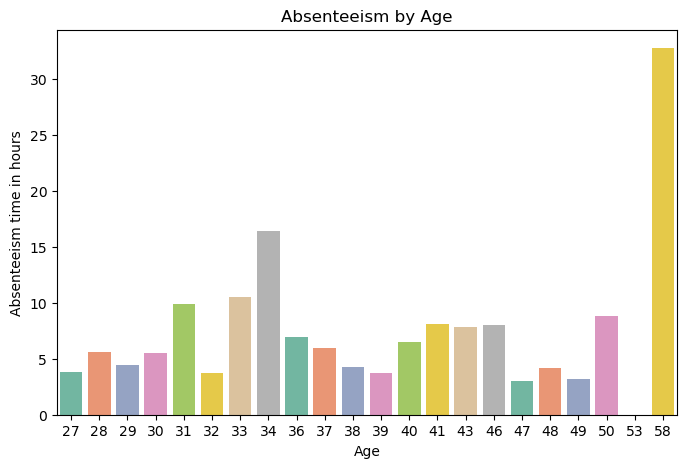

In [28]:
# Q8.How does absenteeism vary by age?
absenteeism_by_age = df.groupby('Age')['Absenteeism time in hours'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Age', y='Absenteeism time in hours', data=absenteeism_by_age, palette="Set2")
plt.title("Absenteeism by Age")
plt.show()

There are slighlty variations in absenteeism time among different age groups, but the overall trend is fairly stable.

Text(0, 0.5, 'Average Service Time')

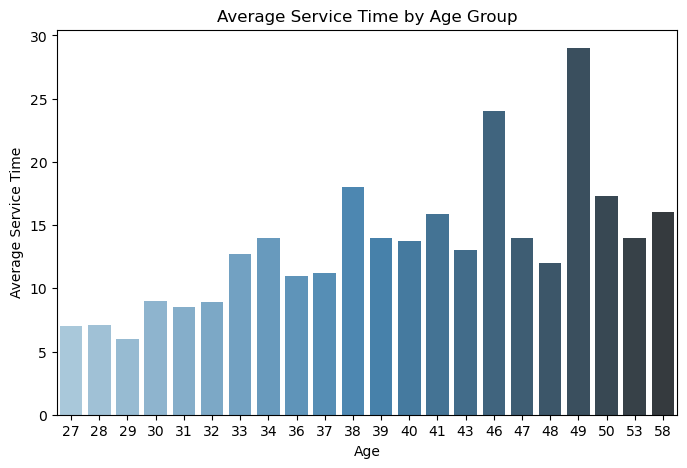

In [29]:
# Q9. Which age is having the maximum service time?
Average_Service_Time_Age= df.groupby('Age')['Service time'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Age', y='Service time',data=Average_Service_Time_Age, palette='Blues_d')
plt.title('Average Service Time by Age Group')
plt.xlabel('Age')
plt.ylabel('Average Service Time')

The average service time generally increase with age as youc can see 49 year old have the highest service time.

In [30]:
# Q10 Is there a trend in absenteeism based on month?

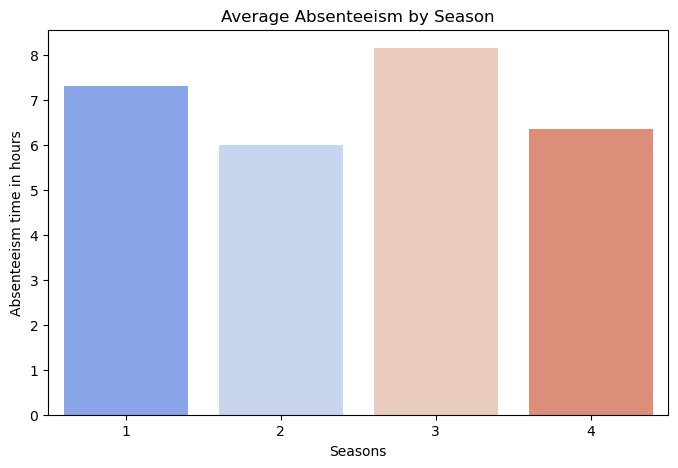

In [31]:
absenteeism_by_season = df.groupby('Seasons')['Absenteeism time in hours'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Seasons', y='Absenteeism time in hours', data=absenteeism_by_season, palette="coolwarm")
plt.title('Average Absenteeism by Season')
plt.show()

Average absenteesim is relatively higher in summers and winters as compared to autumn and spring maybe because extream weather conditions in that season.

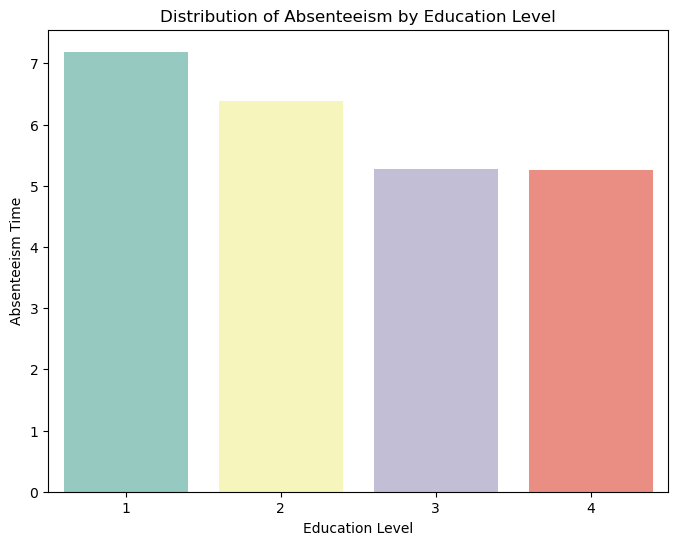

In [32]:
# Q11. What is the distribution of absenteeism by education level?
education_absenteeism = df.groupby('Education')['Absenteeism time in hours'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='Absenteeism time in hours', data=education_absenteeism, palette='Set3')
plt.title("Distribution of Absenteeism by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Absenteeism Time")
plt.show()

The average absenteesim time is slightly higher for graduate(2) and masters and doctor(4)

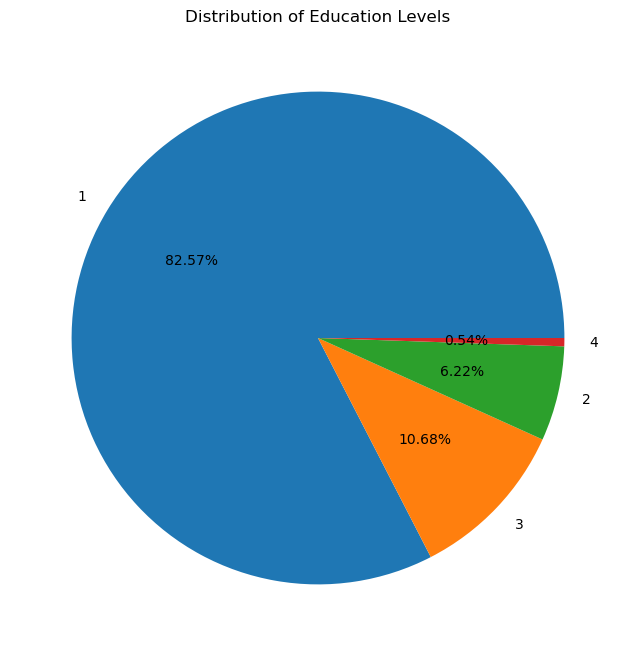

In [33]:
# Q12. What is the distribution of employee education levels?
plt.figure(figsize=(8, 8))
education_counts = df['Education'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct="%0.02f%%")
plt.title('Distribution of Education Levels')
plt.show()

The distribution is heavily skewed towards Level 1, indicating that a significant portion of the workforce has achieved this educational milestone.

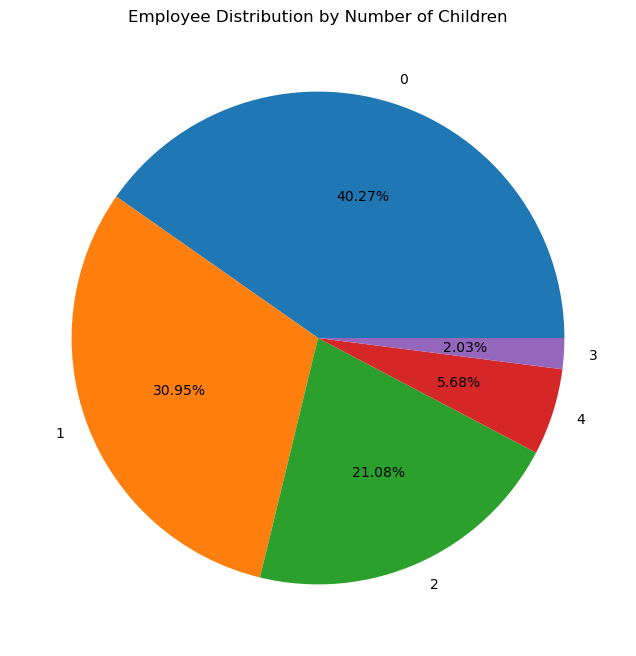

In [34]:
# Q13. What is the proportion of employees with different numbers of children?
plt.figure(figsize=(8, 8))
son_counts = df['Son'].value_counts()
plt.pie(son_counts, labels=son_counts.index, autopct="%0.02f%%")
plt.title('Employee Distribution by Number of Children')
plt.show()

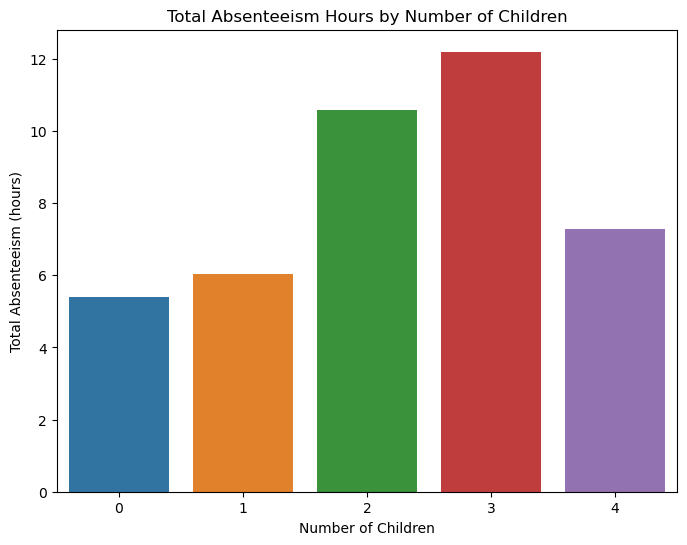

In [35]:
# Q14. How does absenteeism vary by the number of children?
plt.figure(figsize=(8, 6))
son_absenteesim= df.groupby('Son')['Absenteeism time in hours'].mean().reset_index()
sns.barplot(x='Son', y='Absenteeism time in hours',data=son_absenteesim)
plt.title('Total Absenteeism Hours by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Total Absenteeism (hours)')
plt.show()

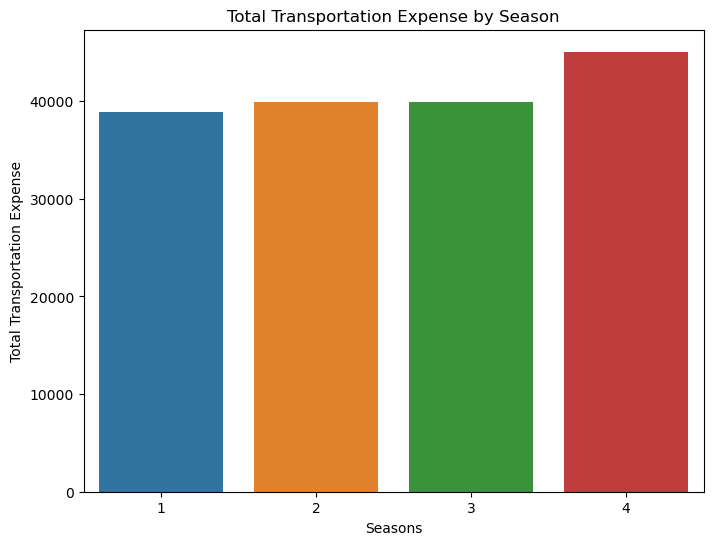

In [36]:
# Q15. What are the total transportation expenses for employees by season?
plt.figure(figsize=(8, 6))
season_expense = df.groupby('Seasons')['Transportation expense'].sum().reset_index()
sns.barplot(x='Seasons', y='Transportation expense', data=season_expense)
plt.title('Total Transportation Expense by Season')
plt.xlabel('Seasons')
plt.ylabel('Total Transportation Expense')
plt.show()

In [37]:
# Q16. What is the average number of hours absent for employees who are social smokers?
avg_absenteeism_smokers = df[df['Social smoker'] == 1]['Absenteeism time in hours'].mean()
print("Average absenteeism time for social smokers:", avg_absenteeism_smokers)

Average absenteeism time for social smokers: 6.5


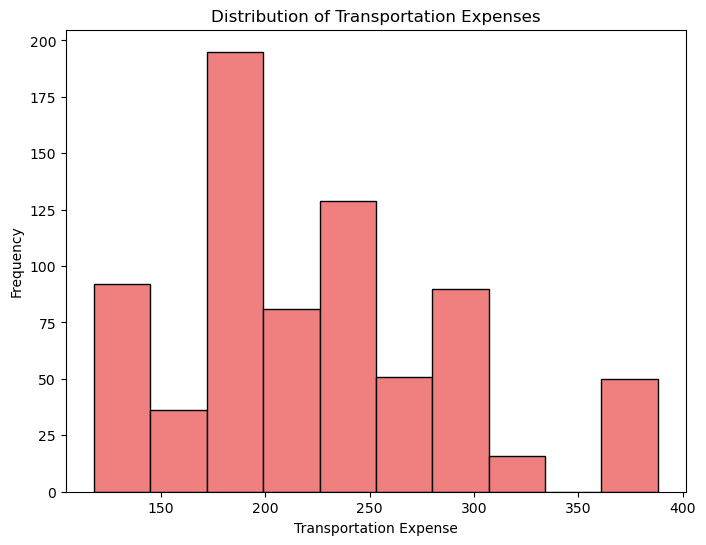

In [38]:
# Q17. What is the distribution of employees’ transportation expenses?
plt.figure(figsize=(8, 6))
plt.hist(df['Transportation expense'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of Transportation Expenses')
plt.xlabel('Transportation Expense')
plt.ylabel('Frequency')
plt.show()

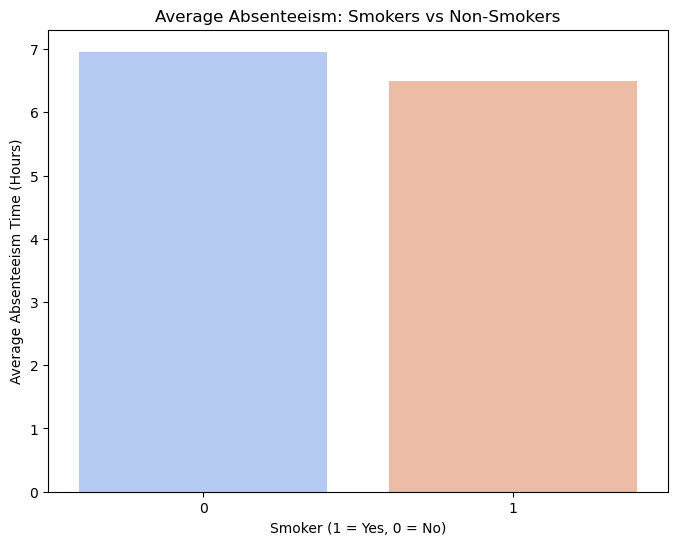

In [39]:
# Q18.  How does absenteeism vary by social smoker status?
smoking_absenteeism = df.groupby('Social smoker')['Absenteeism time in hours'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Social smoker', y='Absenteeism time in hours', data=smoking_absenteeism, palette='coolwarm')
plt.title("Average Absenteeism: Smokers vs Non-Smokers")
plt.xlabel("Smoker (1 = Yes, 0 = No)")
plt.ylabel("Average Absenteeism Time (Hours)")
plt.show()

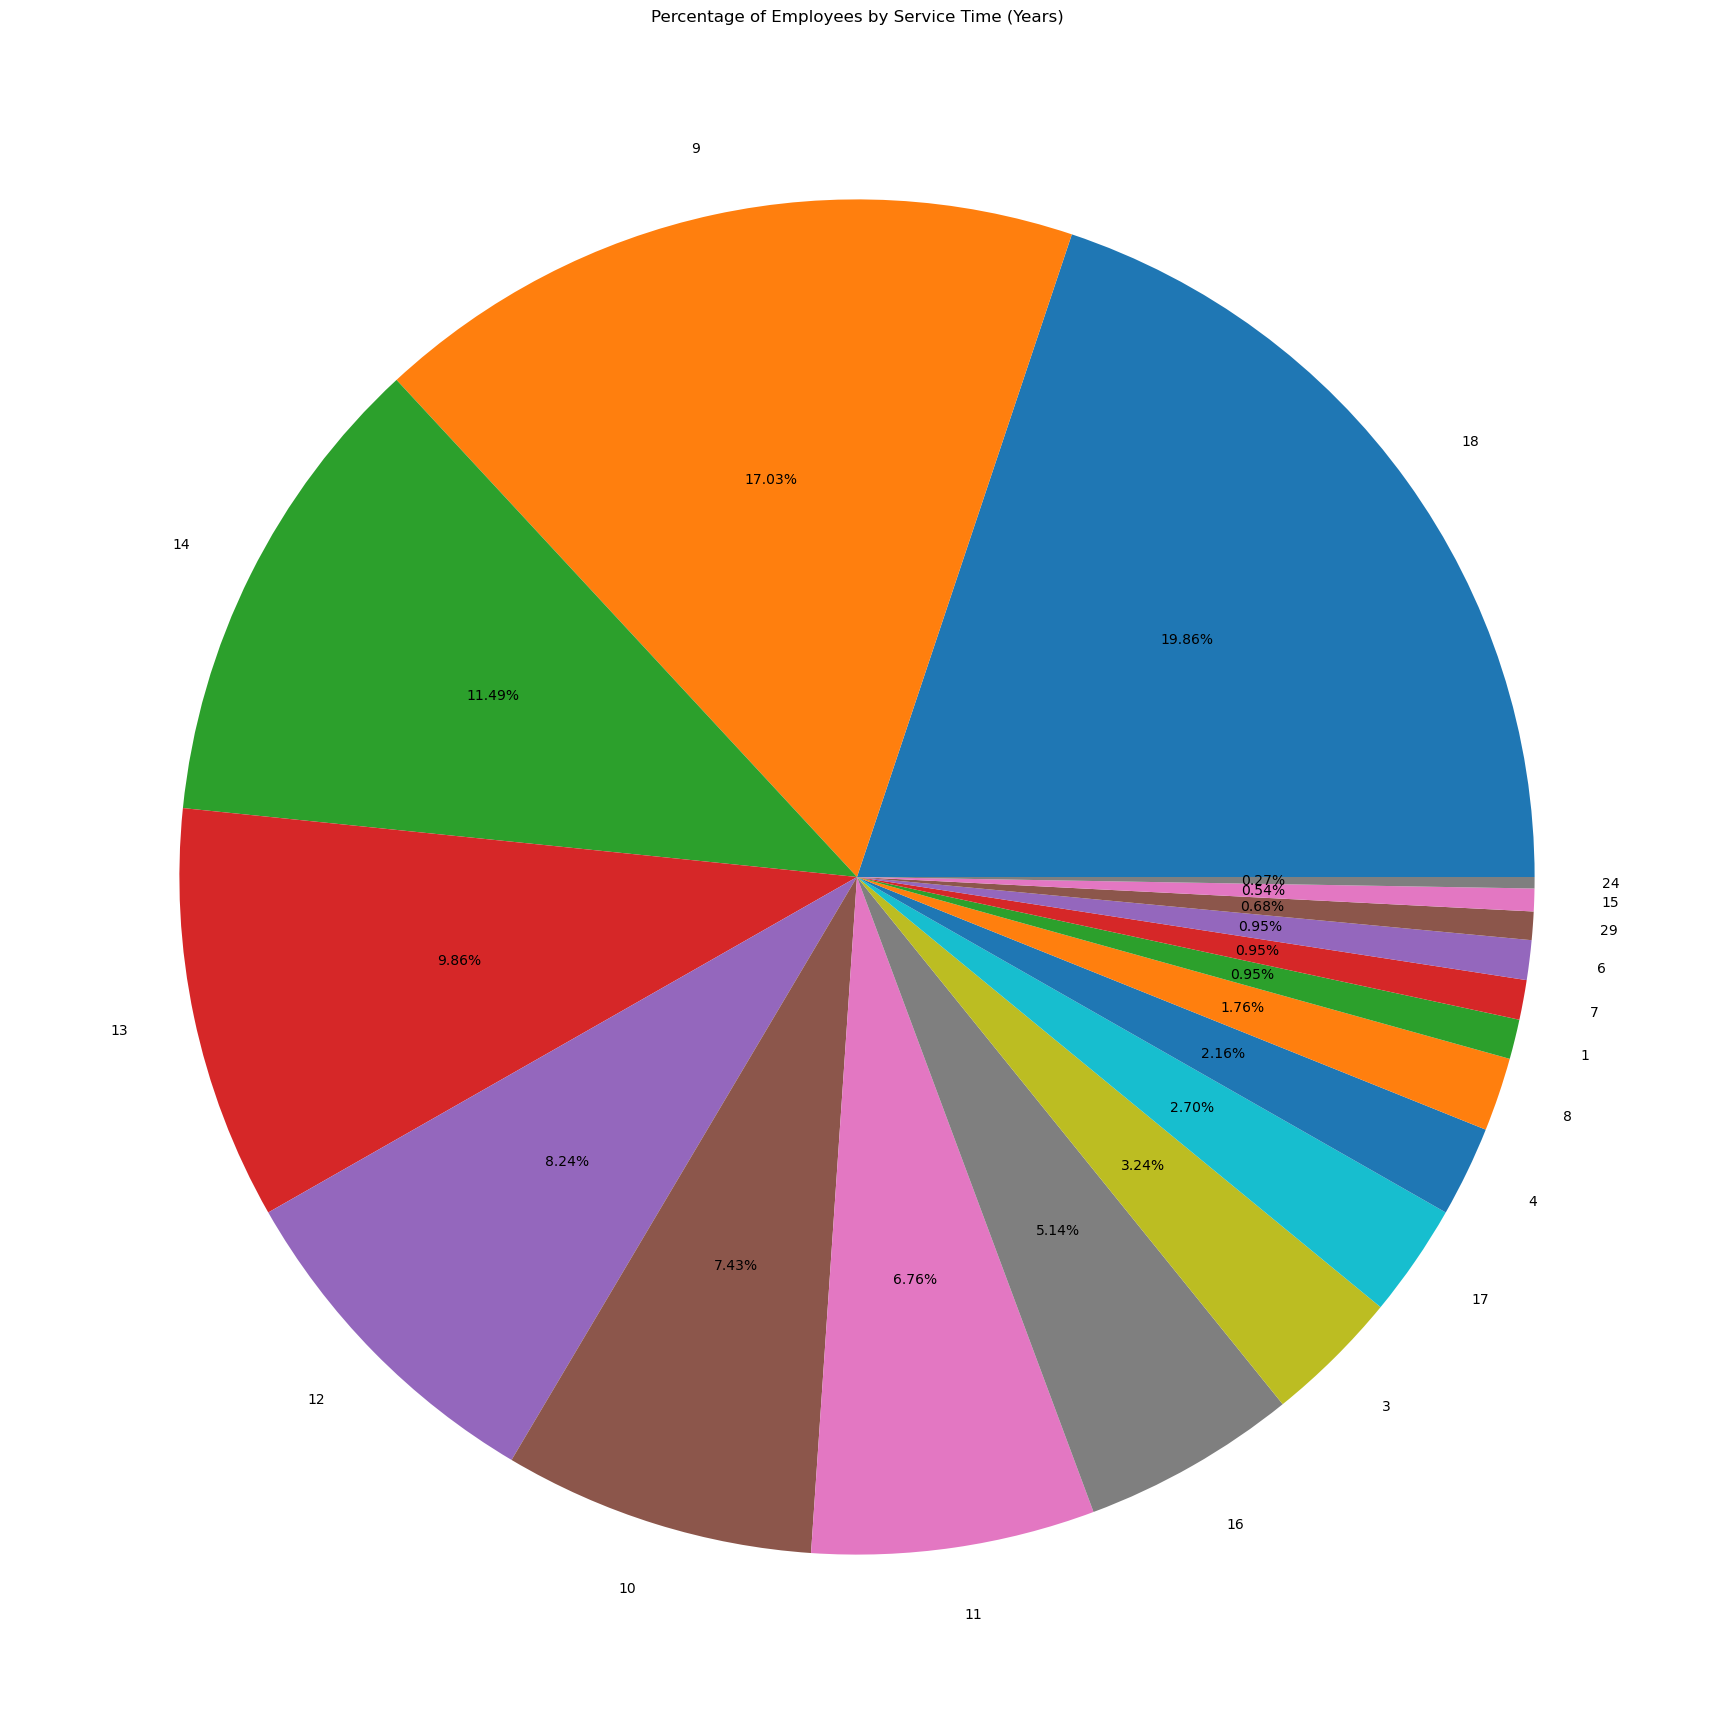

In [40]:
# Q19.What is the percentage of employees by service time?
service_time_distribution = df['Service time'].value_counts()
plt.figure(figsize=(22, 22))
plt.pie(service_time_distribution, labels=service_time_distribution.index, autopct="%0.02f%%")
plt.title('Percentage of Employees by Service Time (Years)')
plt.show()

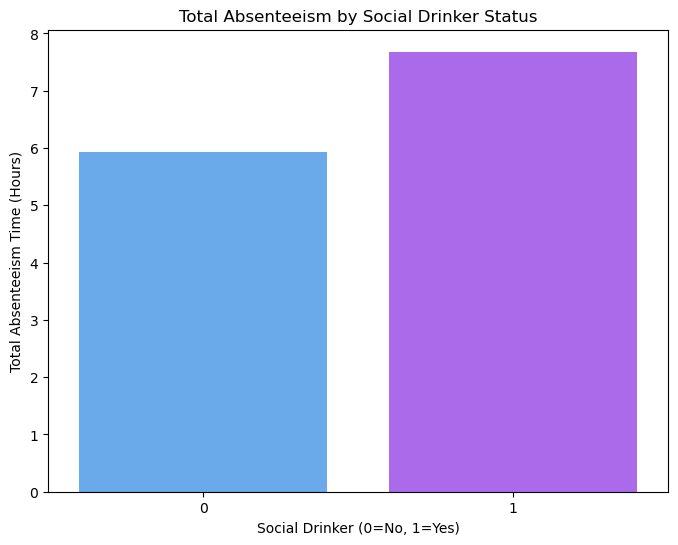

In [41]:
# Q20.What is the total absenteeism by social drinker status?
drinking_absenteeism = df.groupby('Social drinker')['Absenteeism time in hours'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Social drinker', y='Absenteeism time in hours', data=drinking_absenteeism, palette='cool')
plt.title('Total Absenteeism by Social Drinker Status')
plt.xlabel('Social Drinker (0=No, 1=Yes)')
plt.ylabel('Total Absenteeism Time (Hours)')
plt.show()

In [42]:
# task-3

In [43]:
df.dtypes

Unnamed: 0                           int64
ID                                   int64
Reason for absence                   int64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [44]:
df['Transportation expense']= df['Transportation expense'].astype('float')

In [45]:
bool =[['Disciplinary failure','Social drinker' ,'Social smoker','Pet']]

In [46]:
for i in bool:
    df[i]=df[i].astype('bool')

In [47]:
category =[['Reason for absence', 'Day of the week' , 'Seasons' , 'Education']]

In [48]:
for a in category:
    df[a]=df[a].astype('category')

In [49]:
df.dtypes

Unnamed: 0                            int64
ID                                    int64
Reason for absence                 category
Month of absence                    float64
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work       int64
Service time                          int64
Age                                   int64
Work load Average/day               float64
Hit target                            int64
Disciplinary failure                   bool
Education                          category
Son                                   int64
Social drinker                         bool
Social smoker                          bool
Pet                                    bool
Weight                                int64
Height                                int64
Body mass index                       int64
Absenteeism time in hours             int64
dtype: object

In [50]:
df

,Unnamed: 0,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,11,26,7.0,3,1,289.0,36,13,33,...,False,1,2,True,False,True,90,172,30,4
1,1,36,0,7.0,3,1,118.0,13,18,50,...,True,1,1,True,False,False,98,178,31,0
2,2,3,23,7.0,4,1,179.0,51,18,38,...,False,1,0,True,False,False,89,170,31,2
3,3,7,7,7.0,5,1,279.0,5,14,39,...,False,1,2,True,True,False,68,168,24,4
4,4,11,23,7.0,5,1,289.0,36,13,33,...,False,1,2,True,False,True,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,735,11,14,7.0,3,1,289.0,36,13,33,...,False,1,2,True,False,True,90,172,30,8
736,736,1,11,7.0,3,1,235.0,11,14,37,...,False,3,1,False,False,True,88,172,29,4
737,737,4,0,6.0,3,1,118.0,14,13,40,...,False,1,1,True,False,True,98,170,34,0
738,738,8,0,6.0,4,2,231.0,35,14,39,...,False,1,2,True,False,True,100,170,35,0


In [51]:
conti = df.select_dtypes(include = "number")
scaler = MinMaxScaler()
for b in conti:
    df[b]=scaler.fit_transform(df[b].to_numpy().reshape(-1,1))

In [52]:
x =['Disciplinary failure', 'Social drinker' ,'Social smoker','Pet', 'Day of the week' , 'Seasons' , 'Education']
enc = preprocessing.LabelEncoder()
for c in x:
    df[c]=enc.fit_transform(df[c])

In [53]:
df.dtypes

Unnamed: 0                          float64
ID                                  float64
Reason for absence                 category
Month of absence                    float64
Day of the week                       int64
Seasons                               int64
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure                  int64
Education                             int64
Son                                 float64
Social drinker                        int64
Social smoker                         int64
Pet                                   int64
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

In [54]:
df.columns

Index(['Unnamed: 0', 'ID', 'Reason for absence', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [55]:
for i in df.columns:   # very imp
    print(i,"contains \n:",df[i].value_counts())     

Unnamed: 0 contains 
: Unnamed: 0
0.000000    1
0.672530    1
0.660352    1
0.661705    1
0.663058    1
           ..
0.335589    1
0.336942    1
0.338295    1
0.339648    1
1.000000    1
Name: count, Length: 740, dtype: int64
ID contains 
: ID
0.057143    113
0.771429     76
0.942857     55
0.600000     46
0.542857     42
0.285714     40
0.400000     37
1.000000     34
0.657143     30
0.371429     29
0.914286     24
0.257143     24
0.000000     23
0.457143     20
0.114286     19
0.485714     16
0.342857     15
0.685714     10
0.228571      8
0.142857      8
0.628571      8
0.742857      7
0.314286      7
0.828571      7
0.028571      6
0.171429      6
0.714286      5
0.885714      5
0.800000      5
0.514286      3
0.571429      3
0.857143      3
0.200000      2
0.428571      2
0.085714      1
0.971429      1
Name: count, dtype: int64
Reason for absence contains 
: Reason for absence
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10 

In [56]:
df.columns

Index(['Unnamed: 0', 'ID', 'Reason for absence', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [57]:
x_conti = df[["Month of absence", "Distance from Residence to Work","Transportation expense","Service time" ,"Age","Hit target","Son","Weight","Height","Body mass index"]]

In [58]:
def cal_vif(x_conti):
    vif = pd.Series(name="VIF")
    for i in range(0,x_conti.shape[1]):
        vif[x_conti.columns[i]]= variance_inflation_factor(x_conti.values,i)
    return vif 
vif_values = cal_vif(x_conti)

In [59]:
print(vif_values)

Month of absence                     3.829692
Distance from Residence to Work      5.688897
Transportation expense               4.866848
Service time                        18.136744
Age                                  7.216086
Hit target                          13.217991
Son                                  2.358937
Weight                             311.454892
Height                              40.046685
Body mass index                    287.059923
Name: VIF, dtype: float64


In [60]:
#df.drop(["Unnamed: 0","Service time","Weight", "Height", "Body mass index"], axis= 1, inplace=True)

In [61]:
df.columns

Index(['Unnamed: 0', 'ID', 'Reason for absence', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [62]:
"Month of absence", "Distance from Residence to Work","Transportation expense","Service time" ,"Age","Hit target","Son","Weight","Height","Body mass index", "Day of the week"

('Month of absence',
 'Distance from Residence to Work',
 'Transportation expense',
 'Service time',
 'Age',
 'Hit target',
 'Son',
 'Weight',
 'Height',
 'Body mass index',
 'Day of the week')

In [63]:
indep= df[["Disciplinary failure",'Day of the week']]

In [64]:
dep = df[['Absenteeism time in hours']]

In [65]:
x_train, x_test, y_train, y_test = train_test_split( dep, indep, test_size= 0.2, random_state = 42)

In [66]:
print(x_train.shape)
print(y_train.shape)  
print(x_test.shape)  
print(y_test.shape)     

(592, 1)
(592, 2)
(148, 1)
(148, 2)


In [67]:
lin_reg = LinearRegression()

In [68]:
# step-3 : fitting the model
lin_reg_model =lin_reg.fit(x_train.values, y_train.values) 

In [69]:
print(lin_reg_model.score(x_train.values, y_train.values))

0.013960035999846632


In [70]:
y_pred = lin_reg_model.predict((x_test.to_numpy().reshape(-1,1)))

In [71]:
mse = mean_squared_error(y_test,y_pred)
print("MSE=",mse)
mse = mean_squared_error(y_pred, y_test, squared=False)
print("RMSE=",mse)

print("MAE =",  mean_absolute_error(y_test,y_pred))

r_squared = r2_score(y_test, y_pred)
print("R2 =", r_squared)

MSE= 0.9008627403015744
RMSE= 0.7840422993984913
MAE = 0.5911385189532733
R2 = 0.007024650911371999


Interpretation:
Based on the metrics, the linear regression model is performing poorly in predicting absenteeism time. The low R2 value, high MSE and RMSE, and relatively high MAE indicate that the model is not able to capture the underlying relationship between the independent variables (disciplinary failures and day of the week) and the dependent variable (absenteeism time).Based on the metrics, the linear regression model is performing poorly in predicting absenteeism time. The low R2 value, high MSE and RMSE, and relatively high MAE indicate that the model is not able to capture the underlying relationship between the independent variables (disciplinary failures and day of the week) and the dependent variable (absenteeism time).

What should the management improve from their side?
Ans. The management should improve the way of entering the absence, so that their shouldn't be multiple enteries of a single unique id and it will even make it easier for them to get know the absenteesim of ids in a single go for the whole year.

In [72]:
######################################

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
dep_log= df[['Disciplinary failure']]

In [75]:
df.columns

Index(['Unnamed: 0', 'ID', 'Reason for absence', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [76]:
indep_log = df[['Absenteeism time in hours','Hit target','Work load Average/day ', 'Distance from Residence to Work', 'Seasons', 'Age', 'Son', 'Social smoker']]

In [77]:
indep_log

,Absenteeism time in hours,Hit target,Work load Average/day,Distance from Residence to Work,Seasons,Age,Son,Social smoker
0,0.033333,0.842105,0.194471,0.659574,0,0.193548,0.50,0
1,0.000000,0.842105,0.194471,0.170213,0,0.741935,0.25,0
2,0.016667,0.842105,0.194471,0.978723,0,0.354839,0.00,0
3,0.033333,0.842105,0.194471,0.000000,0,0.387097,0.50,1
4,0.016667,0.842105,0.194471,0.659574,0,0.193548,0.50,0
...,...,...,...,...,...,...,...,...
735,0.066667,0.631579,0.339296,0.659574,0,0.193548,0.50,0
736,0.033333,0.631579,0.339296,0.127660,0,0.322581,0.25,0
737,0.000000,0.736842,0.377540,0.191489,0,0.419355,0.25,0
738,0.000000,0.736842,0.377540,0.638298,1,0.387097,0.50,0


In [78]:
indep_train, indep_test, dep_train, dep_test = train_test_split(indep_log, dep_log, test_size=0.2, random_state=42)

In [79]:
print(indep_train.shape)  # Many columns and 80% rows
print(dep_train.shape)    # 1 column and 80% rows
print(indep_test.shape)   # Many columns and 20% rows
print(dep_test.shape)     # 1 column and 20% rows

(592, 8)
(592, 1)
(148, 8)
(148, 1)


In [80]:
log_reg = LogisticRegression().fit(indep_train, dep_train)

In [81]:
log_reg.score(indep_train, dep_train)

0.9493243243243243

In [82]:
y_pred = log_reg.predict(indep_test)

In [83]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(dep_test, y_pred))

[[138   0]
 [ 10   0]]


In [84]:
from sklearn.metrics import f1_score
print(f1_score(dep_test, y_pred, average = "weighted"))

0.8998298998298998


In [85]:
from sklearn.metrics import accuracy_score
print(accuracy_score(dep_test, y_pred))

0.9324324324324325


In [86]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(dep_test, log_reg.predict_proba(indep_test)[:,1])
print("roc auc scroe is", roc)

roc auc scroe is 0.8144927536231884


In [87]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print("recall", recall_score(dep_test, y_pred, average = "weighted"))
print("precision", precision_score(dep_test, y_pred, average = "weighted")) 

recall 0.9324324324324325
precision 0.8694302410518627


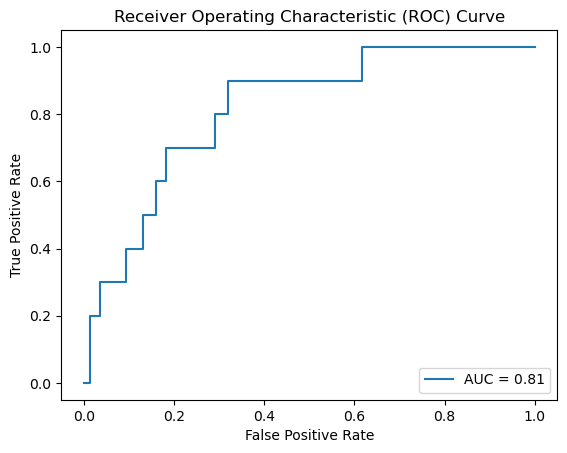

In [88]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Calculate probabilities for the positive class (Label 1)
y_prob = log_reg.predict_proba(indep_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(dep_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [89]:
df.corr()['Disciplinary failure']

Unnamed: 0                        -0.051783
ID                                 0.004502
Reason for absence                -0.545054
Month of absence                   0.106992
Day of the week                   -0.015120
Seasons                            0.151766
Transportation expense             0.109222
Distance from Residence to Work   -0.056527
Service time                      -0.000221
Age                                0.104304
Work load Average/day              0.029026
Hit target                        -0.147971
Disciplinary failure               1.000000
Education                         -0.059298
Son                                0.072096
Social drinker                     0.051838
Social smoker                      0.116748
Pet                               -0.013988
Weight                             0.072225
Height                            -0.010498
Body mass index                    0.079428
Absenteeism time in hours         -0.124248
Name: Disciplinary failure, dtyp

In [90]:
df[['Absenteeism time in hours']]= scaler.fit_transform(df[['Absenteeism time in hours']].to_numpy().reshape(-1,1))

In [91]:
x_k = df[['Hit target', 'Social drinker' ,'Age', 'Work load Average/day ', 'Absenteeism time in hours']]
y_k = df[['Disciplinary failure']]

In [92]:
x_k

,Hit target,Social drinker,Age,Work load Average/day,Absenteeism time in hours
0,0.842105,1,0.193548,0.194471,0.033333
1,0.842105,1,0.741935,0.194471,0.000000
2,0.842105,1,0.354839,0.194471,0.016667
3,0.842105,1,0.387097,0.194471,0.033333
4,0.842105,1,0.193548,0.194471,0.016667
...,...,...,...,...,...
735,0.631579,1,0.193548,0.339296,0.066667
736,0.631579,0,0.322581,0.339296,0.033333
737,0.736842,1,0.419355,0.377540,0.000000
738,0.736842,1,0.387097,0.377540,0.000000


In [93]:
y_k

,Disciplinary failure
0,0
1,1
2,0
3,0
4,0
...,...
735,0
736,0
737,0
738,0


In [94]:
y_k.dtypes

Disciplinary failure    int64
dtype: object

In [95]:
xx_train, xx_test, yy_train, yy_test = train_test_split(x_k, y_k, test_size=0.2, random_state=42)

In [96]:
print(xx_train.shape)  # Many columns and 80% rows
print(yy_train.shape)    # 1 column and 80% rows
print(xx_test.shape)   # Many columns and 20% rows
print(yy_test.shape)     # 1 column and 20% rows

(592, 5)
(592, 1)
(148, 5)
(148, 1)


In [97]:
print(len(xx_train))
my_k = int(round(len(xx_train)**0.5,0))
my_k

592


24

In [98]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

In [99]:
performance = []
k_options = np.arange(2,592,24)

for which_k in k_options:
    temp_model = neighbors.KNeighborsClassifier(which_k)
    temp_model.fit(xx_train, yy_train)
    y_pred_k = temp_model.predict(xx_test)
    print('if k is ', which_k, 'performance is', accuracy_score(yy_test, y_pred_k)*100)
    performance.append(accuracy_score(yy_test, y_pred_k)*100)

if k is  2 performance is 93.24324324324324
if k is  26 performance is 93.24324324324324
if k is  50 performance is 93.24324324324324
if k is  74 performance is 93.24324324324324
if k is  98 performance is 93.24324324324324
if k is  122 performance is 93.24324324324324
if k is  146 performance is 93.24324324324324
if k is  170 performance is 93.24324324324324
if k is  194 performance is 93.24324324324324
if k is  218 performance is 93.24324324324324
if k is  242 performance is 93.24324324324324
if k is  266 performance is 93.24324324324324
if k is  290 performance is 93.24324324324324
if k is  314 performance is 93.24324324324324
if k is  338 performance is 93.24324324324324
if k is  362 performance is 93.24324324324324
if k is  386 performance is 93.24324324324324
if k is  410 performance is 93.24324324324324
if k is  434 performance is 93.24324324324324
if k is  458 performance is 93.24324324324324
if k is  482 performance is 93.24324324324324
if k is  506 performance is 93.243243243

In [100]:
final_model = neighbors.KNeighborsClassifier(2)
final_model.fit(xx_train, yy_train)
y_pred_K = final_model.predict(xx_test)
print("if k is 2 performance is:", accuracy_score(yy_test, y_pred_K)*100)

if k is 2 performance is: 93.24324324324324


In [101]:
# K_means

In [102]:
#pip install yellowbrick

In [103]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [104]:
k_means= df[['Absenteeism time in hours','Reason for absence']]

In [132]:
x_blob, y_blob = make_blobs(n_samples=len(k_means), centers=[[4, 5], [2,-3], [1, 2], [5, 2]], cluster_std=0.8)

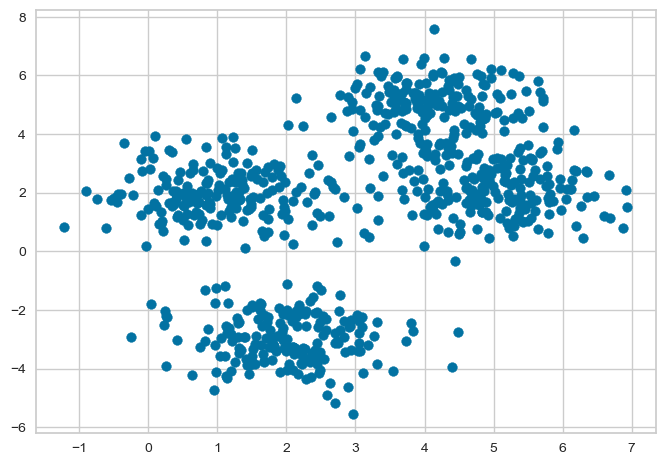

In [133]:
plt.scatter(x_blob[:, 0], x_blob[:, 1])

In [134]:
err=[]
mycluster =np.arange(2,50)
for ii in mycluster:
    model = KMeans(n_clusters=ii)
    model.fit(x_blob)
    err.append(model.inertia_)

Text(0, 0.5, 'Error')

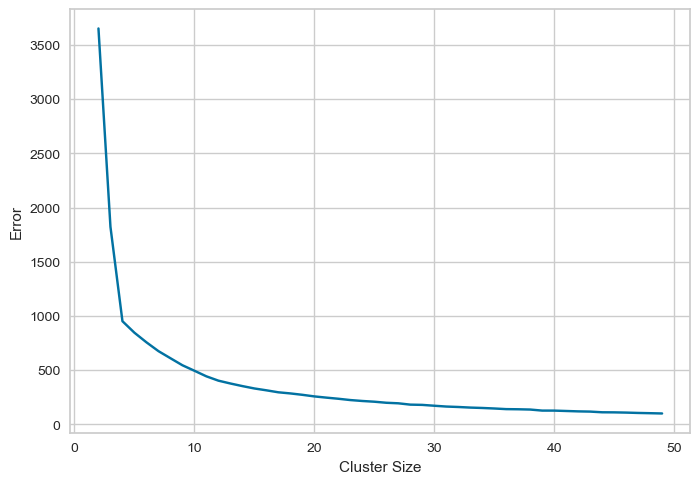

In [135]:
plt.plot(mycluster,err, marker = "x")
plt.xlabel('Cluster Size')
plt.ylabel('Error')

In [136]:
from sklearn.metrics import silhouette_score

for jj in mycluster:
    model = KMeans(n_clusters=jj, random_state = 42)
    model.fit(x_blob)
    sil_avg = silhouette_score(x_blob, model.labels_)
    print("For n_clusters =", jj, "The average silhouette_score is :", sil_avg)

For n_clusters = 2 The average silhouette_score is : 0.5542598914432726
For n_clusters = 3 The average silhouette_score is : 0.5568866588550153
For n_clusters = 4 The average silhouette_score is : 0.6016513085155417
For n_clusters = 5 The average silhouette_score is : 0.5206341006596772
For n_clusters = 6 The average silhouette_score is : 0.4479922251803586
For n_clusters = 7 The average silhouette_score is : 0.35578758794472065
For n_clusters = 8 The average silhouette_score is : 0.3713889341064567
For n_clusters = 9 The average silhouette_score is : 0.3533508590172667
For n_clusters = 10 The average silhouette_score is : 0.34585895205261713
For n_clusters = 11 The average silhouette_score is : 0.34711958051248104
For n_clusters = 12 The average silhouette_score is : 0.350198208820808
For n_clusters = 13 The average silhouette_score is : 0.34704600606092306
For n_clusters = 14 The average silhouette_score is : 0.3383725170174688
For n_clusters = 15 The average silhouette_score is : 0.

SilhouetteVisualizer(ax=<Axes: >,
                     estimator=KMeans(n_clusters=49, random_state=42))

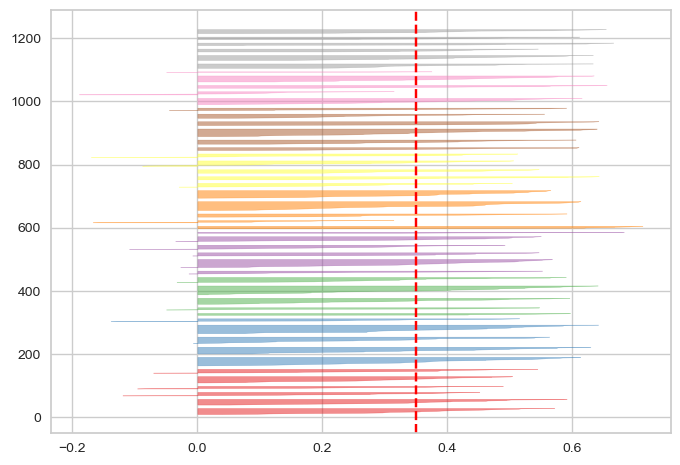

In [137]:
from yellowbrick.cluster import SilhouetteVisualizer
vis = SilhouetteVisualizer(model)
vis.fit(x_blob)

In [144]:
final_km = KMeans(n_clusters=4, random_state=42)
final_km.fit(x_blob)
final_centroid = final_km.cluster_centers_
print("centroids are",final_centroid) 
final_labels = final_km.labels_
print("final labels are", final_labels)
print("errors are",final_km.inertia_)

centroids are [[ 1.03536732  1.97862487]
 [ 4.09215189  4.99547855]
 [ 1.9990757  -2.99121641]
 [ 5.01736254  2.03389143]]
final labels are [1 1 1 2 1 1 1 1 1 2 3 2 1 2 1 0 2 0 0 0 0 2 3 1 2 0 1 2 0 3 2 3 1 0 0 3 1
 1 0 3 3 3 1 2 3 1 0 0 0 1 3 1 0 1 1 0 1 0 1 3 0 1 0 3 2 0 3 1 2 1 2 3 2 3
 0 0 2 3 2 0 0 2 2 0 1 0 0 0 1 3 3 2 3 2 0 2 1 0 3 2 3 0 0 3 0 1 2 1 1 3 2
 1 1 1 1 3 3 0 1 3 3 1 2 1 3 0 0 2 1 1 2 2 2 1 1 0 2 1 0 2 2 1 1 1 0 3 2 0
 2 1 0 1 2 1 0 2 3 3 1 1 1 3 3 3 2 2 3 2 0 2 2 0 2 1 1 2 3 1 0 1 3 0 3 1 0
 0 2 3 0 3 3 1 1 2 1 0 2 2 3 0 0 3 3 0 2 2 0 3 0 3 2 0 0 2 3 1 3 0 0 0 1 0
 0 0 1 2 2 3 1 1 3 0 0 1 3 0 3 2 2 3 0 1 2 0 3 1 0 2 0 1 0 0 2 1 3 1 0 0 1
 0 3 1 1 1 3 2 2 2 3 3 0 0 0 2 2 2 0 3 2 2 1 3 2 1 2 0 2 2 0 3 3 0 1 0 1 0
 3 0 2 2 2 0 3 2 2 0 2 2 2 3 3 1 2 2 2 2 2 0 2 3 3 0 2 1 3 3 2 0 3 1 1 3 2
 0 2 3 3 3 2 3 0 1 3 0 0 2 3 3 3 1 3 0 0 3 3 0 1 3 2 1 3 3 3 3 0 3 1 2 3 0
 0 3 2 3 2 1 0 3 0 0 3 3 3 0 1 0 1 0 3 2 3 3 3 0 0 0 1 1 3 1 3 1 1 0 3 1 3
 1 1 1 1 1 2 2 1 0 2 3 0 0 3 1 3 1 

SilhouetteVisualizer(ax=<Axes: >,
                     estimator=KMeans(n_clusters=4, random_state=42))

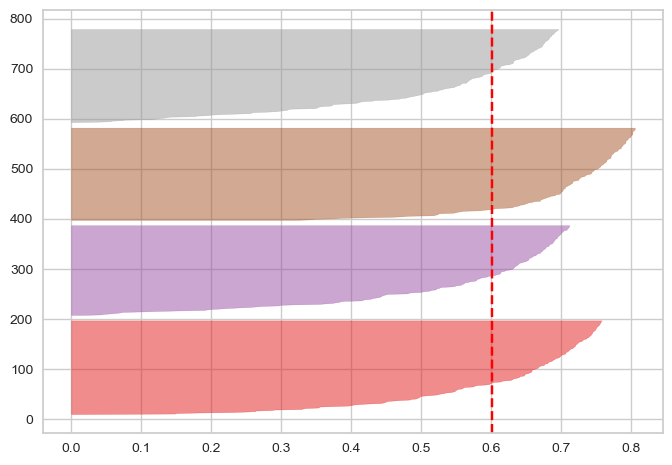

In [145]:
from yellowbrick.cluster import SilhouetteVisualizer
vis = SilhouetteVisualizer(final_km)
vis.fit(x_blob)

In [146]:
df1 = pd.DataFrame(x_blob)

In [147]:
df1['Group_Name'] = final_labels

In [150]:
mylabel = ["A", "B", "C", "D"]

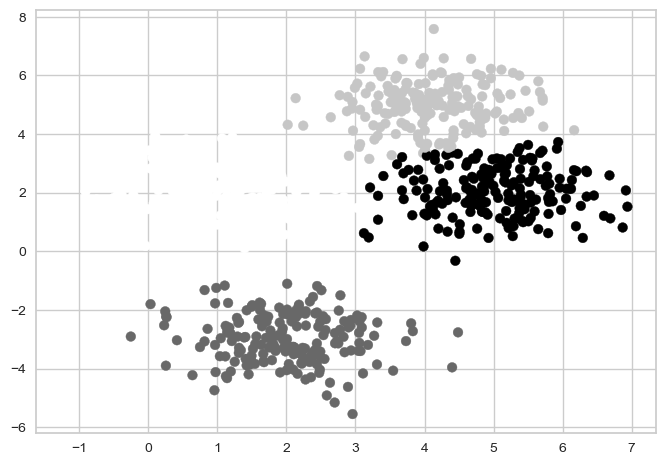

In [151]:
plt.scatter( x_blob[:,0], x_blob[:,1], label = mylabel, c = final_km.labels_)